# Quasi-Random Sequence Generator Comparison

In [1]:
from qmcpy import *

import pandas as pd
pd.options.display.float_format = '{:.2e}'.format

from numpy import *
set_printoptions(threshold=2**10)
set_printoptions(precision=3)

from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


## General Lattice & Sobol Generator Usage
The following example uses the `Lattice` object to generate samples.<br>
The same code works when replacing `Lattice` with `Sobol`

In [2]:
# Unshifted Samples
lattice = Lattice(dimension=2, randomize=False, seed=7, backend='MPS')
unshifted_samples = lattice.gen_samples(n_min=0,n_max=4)
print('Shape: %s'%str(unshifted_samples.shape))
print('Samples:\n'+str(unshifted_samples))

Shape: (4, 2)
Samples:
[[0.   0.  ]
 [0.5  0.5 ]
 [0.25 0.25]
 [0.75 0.75]]


In [3]:
# Shifted Samples
lattice = Lattice(dimension=2, randomize=True, seed=7, backend='GAIL')
shifted_samples = lattice.gen_samples(n_min=4, n_max=8)
print('Shape: %s'%str(shifted_samples.shape))
print('Samples:\n'+str(shifted_samples))

Shape: (4, 2)
Samples:
[[0.201 0.405]
 [0.701 0.905]
 [0.451 0.655]
 [0.951 0.155]]


## QMCPy Generator Times Comparison
Compare the speed of low-discrepancy-sequence generators from Python (QMCPy), MATLAB, and R.<br>
The following blocks visualize a speed comparison with MATLAB when generating 1 dimensional unshifted/unscrambled sequences. Note that the generators are reinitialized before every trial. <br

In [4]:
# Load AccumulateData
df_py = pd.read_csv('../outputs/lds_sequences/python_sequences.csv')
df_py.columns = ['n','py_l_MPS','py_l_GAIL','py_s_QRNG_gc','py_s_QRNG_n','py_s_MPS_QMCPy']
df_m = pd.read_csv('../outputs/lds_sequences/matlab_sequences.csv', header=None)
df_m.columns = ['n', 'm_l', 'm_s']
df_r = pd.read_csv('../outputs/lds_sequences/r_sequences.csv',sep=' ')
df_r.columns = ['n','r_s']
df_r.reset_index(drop=True, inplace=True)

In [5]:
# Lattice DataFrame
df_l = pd.concat([df_py['n'], df_py['py_l_MPS'], df_py['py_l_GAIL'],df_m['m_l']], axis=1)
df_l.columns = ['N_Lattice','QMCPy_MPS','QMCPy_GAIL','MATLAB']
df_l.set_index('N_Lattice')

,QMCPy_MPS,QMCPy_GAIL,MATLAB
N_Lattice,,,
2.00e+00,7.38e-05,7.52e-05,5.66e-03
4.00e+00,8.53e-05,1.15e-04,1.56e-04
8.00e+00,1.19e-04,1.33e-04,1.50e-04
1.60e+01,1.19e-04,1.81e-04,1.54e-04
3.20e+01,1.60e-04,1.95e-04,1.45e-04
6.40e+01,1.70e-04,2.65e-04,1.46e-04
1.28e+02,1.29e-04,2.72e-04,1.53e-04
2.56e+02,1.59e-04,2.74e-04,1.77e-04
5.12e+02,1.57e-04,3.41e-04,1.92e-04


In [6]:
# Sobol DataFrame
df_s = pd.concat([df_py['n'], df_py['py_s_QRNG_n'], df_py['py_s_QRNG_gc'], df_py['py_s_MPS_QMCPy'], df_m['m_s'], df_r['r_s']], axis=1)
df_s.columns = ['N_Sobol','QMCPy_QRNG_N','QMCPy_QRNG_GC','QMCPy_MPS','MATLAB','R']
df_s.set_index('N_Sobol')

,QMCPy_QRNG_N,QMCPy_QRNG_GC,QMCPy_MPS,MATLAB,R
N_Sobol,,,,,
2.00e+00,5.76e-05,1.92e-05,5.72e-04,5.03e-03,1.62e-04
4.00e+00,3.78e-05,1.96e-05,3.87e-04,4.99e-04,1.48e-04
8.00e+00,3.48e-05,1.82e-05,4.23e-04,4.25e-04,1.55e-04
1.60e+01,3.42e-05,1.88e-05,3.99e-04,3.69e-04,1.55e-04
3.20e+01,4.32e-05,2.50e-05,4.31e-04,4.09e-04,1.71e-04
6.40e+01,4.60e-05,2.11e-05,6.28e-04,3.12e-04,1.56e-04
1.28e+02,3.73e-05,2.12e-05,6.21e-04,4.47e-04,1.77e-04
2.56e+02,3.75e-05,2.20e-05,1.00e-03,4.73e-04,1.76e-04
5.12e+02,4.58e-05,5.13e-05,2.66e-03,7.27e-04,3.87e-04


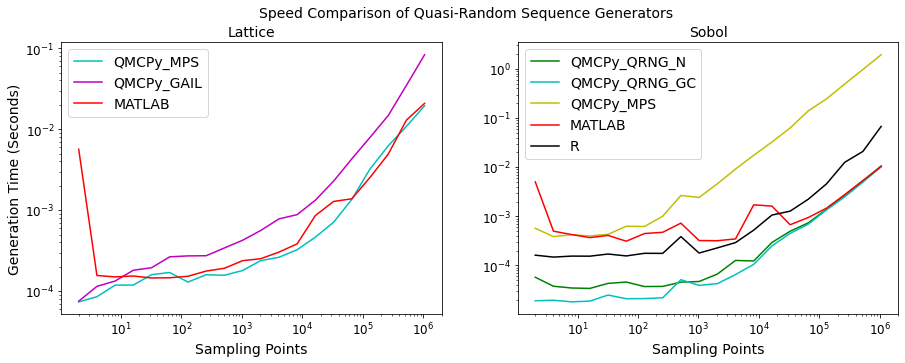

In [7]:
# Plot AccumulateData
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
# Lattice
n = df_l['N_Lattice']
for l_type,color in zip(['QMCPy_MPS','QMCPy_GAIL','MATLAB'],['c','m','r']):
    ax[0].loglog(n, df_l[l_type], label=l_type, color=color)
ax[0].legend(loc='upper left')
ax[0].set_xlabel('Sampling Points')
ax[0].set_ylabel('Generation Time (Seconds)')
ax[0].set_title('Lattice')
# Sobol Plot
n = df_s['N_Sobol']
for s_type,color in zip(['QMCPy_QRNG_N','QMCPy_QRNG_GC','QMCPy_MPS','MATLAB','R'],['g','c','y','r','k','b']):
    ax[1].loglog(n, df_s[s_type], label=s_type, color=color)
ax[1].legend(loc='upper left')
ax[1].set_xlabel('Sampling Points')
ax[1].set_title('Sobol')
# Metas and Export
fig.suptitle('Speed Comparison of Quasi-Random Sequence Generators')
plt.savefig('../outputs/lds_sequences/lds_generator_times.png', dpi=200)

For lattice, QMCPy with GAIL backend is slower than both the Magic Point Shop backend and MATLAB. For Sobol, QMCPy with Magic Point Shop backend is significantly slower than using PyTorch backend or generating with MATLAB or R. It is important to note the above results are for 1 replication of unshifted/unscrambled nodes and individual generator instances were initialized before each trial.  